**1.Import Required Libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**2.Load Dataset**

In [62]:
# Change file name if needed
df = pd.read_csv("/content/Indian_earthquake_data.csv")

# Display first 5 rows
df.head()

,ï»¿Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


**3.Dataset Information**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Origin Time  2719 non-null   object 
 1   Latitude        2719 non-null   float64
 2   Longitude       2719 non-null   float64
 3   Depth           2719 non-null   float64
 4   Magnitude       2719 non-null   float64
 5   Location        2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


In [64]:
print(df.isnull().sum())


ï»¿Origin Time    0
Latitude          0
Longitude         0
Depth             0
Magnitude         0
Location          0
dtype: int64


**4.Handle Missing Values**

In [65]:
# Drop rows with missing values
df = df.dropna()

print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (2719, 6)


**5.Feature Selection**

In [66]:
X = df.drop(["Magnitude", "ï»¿Origin Time", "Location"], axis=1)   # Features
y = df["Magnitude"]               # Target

**6.Train-Test Split**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**7.Feature Scaling**

In [68]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**8.Train Random Forest Model**

In [69]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

**9.Make Predictions**

In [70]:
y_pred = model.predict(X_test)

**10.Model Evaluation**

In [71]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.4196812428507969
Root Mean Squared Error (RMSE): 0.5549989527652643
R² Score: 0.4762528192047647


**11.Actual vs Predicted Plot**

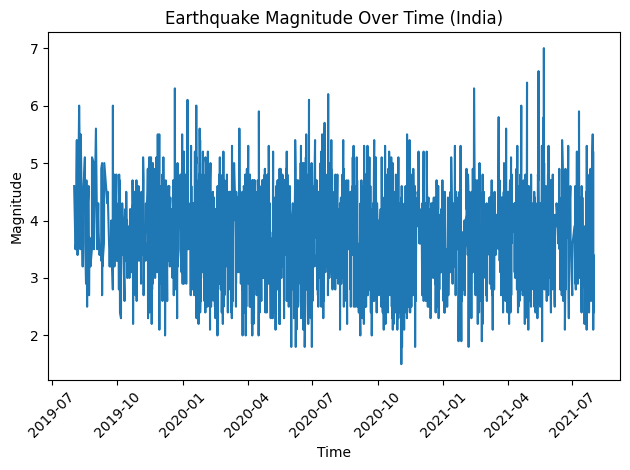

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Changed file name from .xlsx to .csv and read_excel to read_csv
file_path = "/content/Indian_earthquake_data.csv"
df = pd.read_csv(file_path)

# Fix first column name if corrupted
df.rename(columns={df.columns[0]: "Origin Time"}, inplace=True)

# Convert time column to datetime
df["Origin Time"] = pd.to_datetime(
    df["Origin Time"].str.replace(" IST", "", regex=False),
    errors="coerce"
)

# Sort by time
df = df.sort_values("Origin Time")

# Create line graph
plt.figure()
plt.plot(df["Origin Time"], df["Magnitude"])
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Earthquake Magnitude Over Time (India)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**12.Feature Importance**

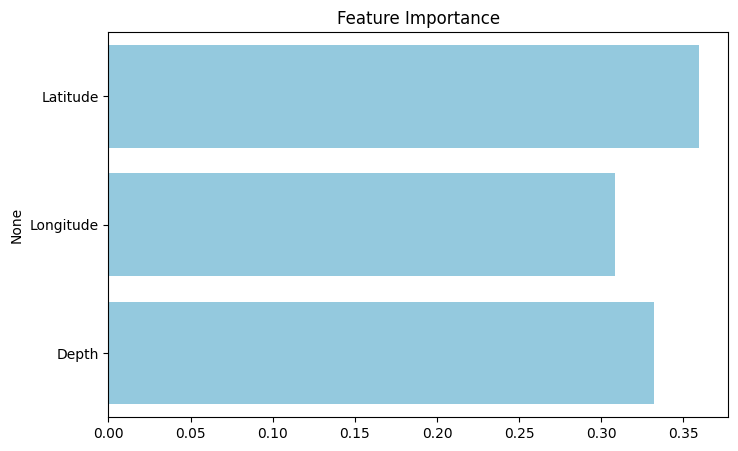

In [73]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, color='skyblue')
plt.title("Feature Importance")
plt.show()

**13.Save the Trained Model**

In [74]:
import joblib

joblib.dump(model, "earthquake_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


**14.Load & Predict on New Data**

In [75]:
# Example new input (replace values)
new_data = np.array([[34.5, 78.2, 10.5]])  # latitude, longitude, depth

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print("Predicted Earthquake Magnitude:", prediction[0])

Predicted Earthquake Magnitude: 3.9049999999999976


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
joblib.dump(model, "earthquake_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']